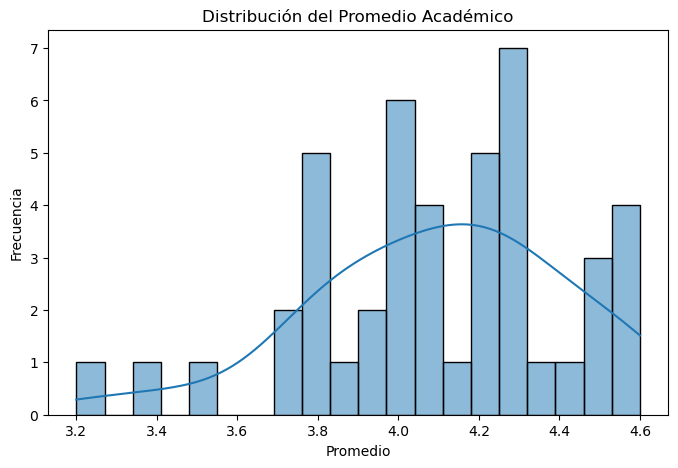

c:\Users\port_val\miniconda3\envs\analitica\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.822e-04, tolerance: 3.717e-04
  model = cd_fast.enet_coordinate_descent(


🔹 Variables seleccionadas con Lasso: ['edad', 'semestre', 'horas_area', 'frecuencia_estudio', 'horas_estudio_semana', 'beca', 'facultad_Facultad de Comunicación', 'facultad_Facultad de Medicina', 'facultad_Facultad de Psicologia & Ciencias del Comportamiento', 'area_tiempo_libre_Biblioteca. Facultad. Ad portas', 'area_tiempo_libre_Biblioteca. Mesas del D. Sala de estudio', 'area_tiempo_libre_Cafe bolsa. Punto verde. Meson. Biblioteca. Ad portas. Arena Sabana. Canchas deportivas. Atelier', 'area_tiempo_libre_Embarcadero', 'area_tiempo_libre_Embarcadero. Cafe bolsa. Punto verde. Mesas del O', 'area_tiempo_libre_Embarcadero. Estudioteca. Punto verde', 'area_tiempo_libre_Embarcadero. Pasto', 'area_tiempo_libre_Embarcadero. Punto verde. Salón Desocupado', 'area_tiempo_libre_Estudioteca', 'area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde', 'area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde. Ad portas. Atelier. Sala de estudio', 'area_tiempo_libre_Estudioteca. Meson. Mesas del O. M

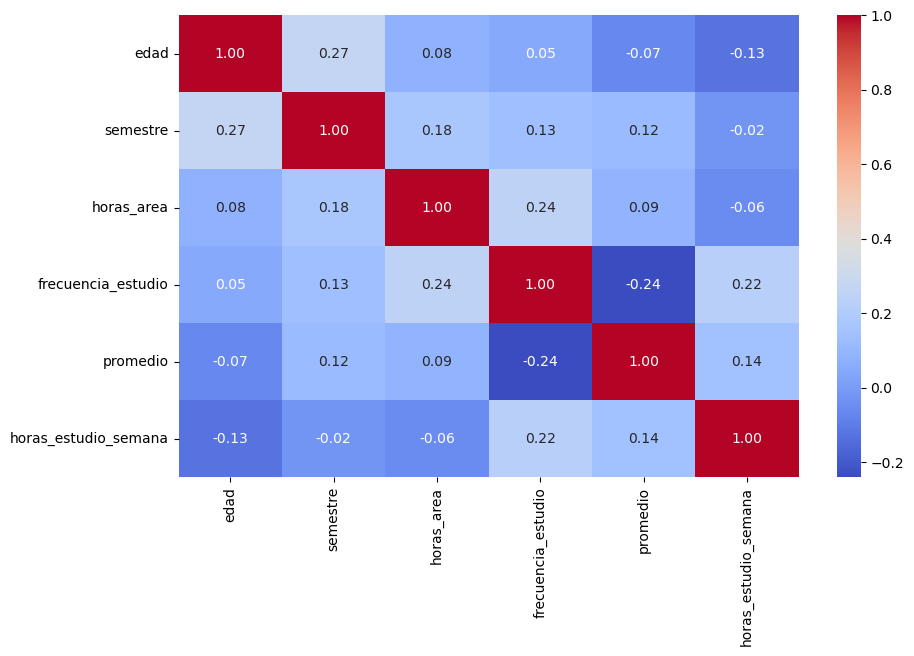

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Cargar los datos
df = pd.read_csv(r"C:\Users\port_val\Downloads\Formulario sin título (respuestas) - Respuestas de formulario 1.csv")

# Renombrar columnas para facilitar su manejo
df.columns = ['timestamp', 'edad', 'facultad', 'semestre', 'area_tiempo_libre', 'horas_area', 
              'frecuencia_estudio', 'promedio', 'horas_estudio_semana', 'modalidad_estudio', 
              'lugar_estudio', 'beca', 'trabajo', 'actividades_extracurriculares']

# Limpiar valores que contienen caracteres no numéricos
df = df.replace({'%': '', ',': '.'}, regex=True)

# Convertir columnas numéricas
num_cols = ['edad', 'semestre', 'horas_area', 'frecuencia_estudio', 'promedio', 'horas_estudio_semana']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Eliminar valores nulos
df = df.dropna()

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['facultad', 'area_tiempo_libre', 'modalidad_estudio', 'lugar_estudio', 'trabajo', 'actividades_extracurriculares'], drop_first=True)

# Distribución del promedio
plt.figure(figsize=(8,5))
sns.histplot(df['promedio'], bins=20, kde=True)
plt.title('Distribución del Promedio Académico')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre variables numéricas y el promedio
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Definir variables predictoras y variable objetivo
X = df.drop(columns=['timestamp', 'promedio'])
y = df['promedio']

# **Aplicar Lasso Regression para selección de variables con max_iter=5000**
lasso = LassoCV(cv=5, alphas=np.logspace(-4, 4, 50), max_iter=50000).fit(X, y)

# Seleccionar las variables más relevantes
selected_features = X.columns[lasso.coef_ != 0]
X = X[selected_features]

print(f'🔹 Variables seleccionadas con Lasso: {list(selected_features)}')

# ** Calcular R² usando toda la data con las variables seleccionadas**
model_full = LinearRegression()
model_full.fit(X, y)
r2_full = model_full.score(X, y)
print(f'🔹 R² usando toda la data (con Lasso): {r2_full:.4f}')

# **Dividir en conjuntos de entrenamiento (80%) y prueba (20%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# ** Construir modelo de regresión lineal**
model = LinearRegression()
model.fit(X_train, y_train)

# **Evaluar modelo**
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R² de entrenamiento: {r2_train:.4f}')
print(f'R² de prueba: {r2_test:.4f}')
print(f'MSE de prueba: {mse_test:.4f}')

# ** Aplicar Validación Cruzada (Cross-Validation) con 5 folds**
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# **Mostrar resultados de Cross-Validation**
print(f'R² en cada fold de Cross-Validation: {cv_scores}')
print(f'R² promedio en Cross-Validation: {cv_scores.mean():.4f}')




In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Cargar los datos
df = pd.read_csv(r"C:\Users\port_val\Downloads\Formulario sin título (respuestas) - Respuestas de formulario 1.csv")

# Renombrar columnas para facilitar su manejo
df.columns = ['timestamp', 'edad', 'facultad', 'semestre', 'area_tiempo_libre', 'horas_area', 
              'frecuencia_estudio', 'promedio', 'horas_estudio_semana', 'modalidad_estudio', 
              'lugar_estudio', 'beca', 'trabajo', 'actividades_extracurriculares']

# Limpiar valores que contienen caracteres no numéricos
df = df.replace({'%': '', ',': '.'}, regex=True)

# Convertir columnas numéricas
num_cols = ['edad', 'semestre', 'horas_area', 'frecuencia_estudio', 'promedio', 'horas_estudio_semana']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Eliminar valores nulos
df = df.dropna()

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['facultad', 'area_tiempo_libre', 'modalidad_estudio', 'lugar_estudio', 'trabajo'], drop_first=True)

# Seleccionar solo las 9 variables deseadas
selected_features = [
    'area_tiempo_libre_Terraza escuela. Mesas del D. Atelier',
    'area_tiempo_libre_Estudioteca',
    'area_tiempo_libre_Punto verde. Ad portas',
    'area_tiempo_libre_Estudioteca. Cafe bolsa. Punto verde',
    'area_tiempo_libre_Embarcadero. Cafe bolsa. Punto verde. Mesas del O',
     'area_tiempo_libre_Mesas del F. Mesas del D. Salón Desocupado',
    'lugar_estudio_Estudioteca. Mesas del D. Atelier',
    'facultad_Facultad de Comunicación',
    'trabajo_Sí',
    'modalidad_estudio_solo/a'
]
X = df[selected_features]
y = df['promedio']

# ** Calcular R² usando toda la data con las variables seleccionadas**
model_full = LinearRegression()
model_full.fit(X, y)
r2_full = model_full.score(X, y)
print(f'🔹 R² usando toda la data (con variables seleccionadas): {r2_full:.4f}')

# **Dividir en conjuntos de entrenamiento (80%) y prueba (20%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# ** Construir modelo de regresión lineal**
model = LinearRegression()
model.fit(X_train, y_train)

# **Evaluar modelo**
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R² de entrenamiento: {r2_train:.4f}')
print(f'R² de prueba: {r2_test:.4f}')
print(f'MSE de prueba: {mse_test:.4f}')

# ** Aplicar Validación Cruzada (Cross-Validation) con 5 folds**
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# **Mostrar resultados de Cross-Validation**
print(f'R² en cada fold de Cross-Validation: {cv_scores}')
print(f'R² promedio en Cross-Validation: {cv_scores.mean():.4f}')

🔹 R² usando toda la data (con variables seleccionadas): 0.6337
R² de entrenamiento: 0.6052
R² de prueba: 0.0482
MSE de prueba: 0.0854
R² en cada fold de Cross-Validation: [-0.00588892  0.22608741  0.05451461 -0.02728549 -0.16338036]
R² promedio en Cross-Validation: 0.0168
